In [197]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading leads data from csv files

In [198]:
lead_data=pd.read_csv('Leads.csv')

In [199]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [200]:
lead_data.shape

(9240, 37)

### Checking columns with missing values

In [201]:
lead_data=lead_data.replace("Select", np.nan)


In [202]:
na_data=lead_data.isna().sum()*100/9240
with pd.option_context('display.max_rows', None,):
    print(na_data[na_data>0].sort_values())

Lead Source                                       0.389610
Last Activity                                     1.114719
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Specialization                                   36.580087
City                                             39.707792
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Profile Score                       45.649351
Lead Quality                                     51.590909
Lead Profile                                     74.188312
How did you hear about X Education               78.4632

In [203]:
lead_data.isna().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Lead Number                 

### Removing columns having missing data more than 35% as these are not going to help much in analysis with missing values

In [204]:
na_greater_35=na_data[na_data>35]
na_greater_35=na_greater_35.reset_index()
na_greater_35['index'].values
column_to_drop=list(na_greater_35['index'].values)
lead_data=lead_data.drop(column_to_drop,axis=1)

In [205]:
na_data=lead_data.isna().sum()*100/9240
with pd.option_context('display.max_rows', None,):
    print(na_data[na_data>0].sort_values())

Lead Source                                       0.389610
Last Activity                                     1.114719
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
dtype: float64


In [206]:
with pd.option_context('display.max_rows', None,):
    lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning and missing value imputation of the columns identified for analysis

In [207]:
lead_data['Prospect ID'].value_counts(normalize=True,dropna=False)*100

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.010823
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.010823
46befc49-253a-419b-abea-2fd978d2e2b1    0.010823
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.010823
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.010823
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.010823
644099a2-3da4-4d23-9546-7676340a372b    0.010823
2a093175-415b-4321-9e69-ed8d9df65a3c    0.010823
c66249a3-8500-4c66-a511-312d914573de    0.010823
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.010823
Name: Prospect ID, Length: 9240, dtype: float64

#### droping Prospect ID as this is a id values not going ti help in model building

In [208]:
lead_data=lead_data.drop('Prospect ID',axis=1)

In [209]:
lead_data['Lead Number'].value_counts(normalize=True,dropna=False)*100

660737    0.010823
603303    0.010823
602561    0.010823
602557    0.010823
602540    0.010823
            ...   
630422    0.010823
630405    0.010823
630403    0.010823
630390    0.010823
579533    0.010823
Name: Lead Number, Length: 9240, dtype: float64

#### droping Lead Number as this is a id values not going ti help in model building

In [210]:
lead_data=lead_data.drop('Lead Number',axis=1)

In [211]:
lead_data['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

#### here we can combine Lead Add Form, Lead Import, Quick Add Form as others as there are very less values

In [212]:
lead_data['Lead Origin']=lead_data['Lead Origin'].apply(lambda x: 'Others' if x in ['Lead Add Form','Lead Import','Quick Add Form'] else x)

In [213]:
lead_data['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Others                      8.376623
Name: Lead Origin, dtype: float64

In [214]:
lead_data['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

#### Except top 5 values will be combining all other values as others

In [215]:
lead_data['Lead Source']=lead_data['Lead Source'].apply(lambda x: 'Others' if x not in ['Google','Direct Traffic','Olark Chat','Organic Search','Reference'] else x)

In [216]:
lead_data['Lead Source'].value_counts(normalize=True)*100

Google            31.038961
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Others             4.177489
Name: Lead Source, dtype: float64

In [217]:
lead_data['Do Not Email'].value_counts(normalize=True)*100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [218]:
lead_data['Do Not Call'].value_counts(normalize=True)*100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [219]:
lead_data['Converted'].value_counts(normalize=True)*100 

0    61.461039
1    38.538961
Name: Converted, dtype: float64

In [220]:
lead_data['TotalVisits'].value_counts(normalize=True)*100  

0.0      24.047017
2.0      18.455454
3.0      14.346919
4.0      12.303636
5.0       8.601560
6.0       5.119191
1.0       4.339229
7.0       3.394485
8.0       2.460727
9.0       1.801604
10.0      1.252334
11.0      0.944743
13.0      0.527299
12.0      0.494343
14.0      0.395474
16.0      0.230693
15.0      0.197737
17.0      0.175766
18.0      0.164781
20.0      0.131825
19.0      0.098869
21.0      0.065912
23.0      0.065912
24.0      0.054927
25.0      0.054927
27.0      0.054927
22.0      0.032956
29.0      0.021971
28.0      0.021971
26.0      0.021971
141.0     0.010985
55.0      0.010985
30.0      0.010985
43.0      0.010985
74.0      0.010985
41.0      0.010985
54.0      0.010985
115.0     0.010985
251.0     0.010985
32.0      0.010985
42.0      0.010985
Name: TotalVisits, dtype: float64

In [221]:
lead_data.TotalVisits.isnull().sum()

137

In [222]:
lead_data['TotalVisits'].mean()

3.445237833681204

In [223]:
lead_data['TotalVisits'].median()

3.0

In [224]:
lead_data['TotalVisits']=lead_data['TotalVisits'].fillna(value=3)

In [225]:
lead_data.TotalVisits.isnull().sum()

0

In [226]:
lead_data['Total Time Spent on Website'].value_counts(normalize=True)*100   

0       23.733766
60       0.205628
74       0.194805
75       0.194805
127      0.194805
          ...    
1701     0.010823
1952     0.010823
1229     0.010823
1743     0.010823
927      0.010823
Name: Total Time Spent on Website, Length: 1731, dtype: float64

In [227]:
lead_data['Total Time Spent on Website'].isnull().sum()

0

In [228]:
lead_data['Page Views Per Visit'].value_counts(normalize=True)*100     

0.00    24.047017
2.00    19.718774
3.00    13.138526
4.00     9.842909
1.00     7.151489
          ...    
3.43     0.010985
2.56     0.010985
6.33     0.010985
1.64     0.010985
2.08     0.010985
Name: Page Views Per Visit, Length: 114, dtype: float64

In [229]:
lead_data['Page Views Per Visit'].isnull().sum()

137

In [230]:
lead_data['Page Views Per Visit'].mean()

2.3628199494672093

In [231]:
lead_data['Page Views Per Visit'].median()

2.0

In [232]:
lead_data['Page Views Per Visit']=lead_data['Page Views Per Visit'].fillna(value=2)

In [233]:
lead_data['Page Views Per Visit'].isnull().sum()

0

In [234]:
lead_data['Last Activity'].value_counts(normalize=True)*100    

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [235]:
#replacing Nan Values with mode value "Email Opened"

lead_data['Last Activity'] = lead_data['Last Activity'].replace(np.nan,'Email Opened')

In [236]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [237]:
lead_data['Country'].value_counts(normalize=True)*100    

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [238]:
lead_data['What is your current occupation'].value_counts(normalize=True,dropna=False)*100     

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [239]:
### replace missing value with Not provided
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Not provided')

In [240]:
lead_data['What is your current occupation'].value_counts(normalize=True)*100     

Unemployed              60.606061
Not provided            29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [241]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100      

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [242]:
#### replace null value with the Better Career Prospects as the final intestion will be always Better Career Prospects
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')


In [243]:
lead_data['Search'].value_counts(normalize=True)*100      

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [244]:
lead_data['Magazine'].value_counts(normalize=True)*100      

No    100.0
Name: Magazine, dtype: float64

In [245]:
lead_data['Newspaper Article'].value_counts(normalize=True)*100      

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [246]:
lead_data['X Education Forums'].value_counts(normalize=True)*100      

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [247]:
lead_data['Newspaper'].value_counts(normalize=True)*100      

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [248]:
lead_data['Digital Advertisement'].value_counts(normalize=True)*100      

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [249]:
lead_data['Through Recommendations'].value_counts(normalize=True)*100      

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [250]:
lead_data['Receive More Updates About Our Courses'].value_counts(normalize=True)*100      

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [251]:
lead_data['Update me on Supply Chain Content'].value_counts(normalize=True)*100      

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [252]:
lead_data['Get updates on DM Content'].value_counts(normalize=True)*100      

No    100.0
Name: Get updates on DM Content, dtype: float64

In [253]:
lead_data['I agree to pay the amount through cheque'].value_counts(normalize=True)*100      

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [254]:
lead_data['A free copy of Mastering The Interview'].value_counts(normalize=True)*100      

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

In [255]:
lead_data['Last Notable Activity'].value_counts(normalize=True)*100      

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [256]:
#clubbing lower frequency values

lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

In [257]:
lead_data['Last Notable Activity'].value_counts(normalize=True)*100      

Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Page Visited on Website     3.441558
Olark Chat Conversation     1.980519
Email Link Clicked          1.872294
Others                      1.731602
Name: Last Notable Activity, dtype: float64

#### Categorical columns having single values are not going to help in model so droping all the columns with single values
     Receive More Updates About Our Courses
     Update me on Supply Chain Content 
     Get updates on DM Content
     Magazine
     I agree to pay the amount through cheque

In [258]:
lead_data=lead_data.drop('Receive More Updates About Our Courses',axis=1)
lead_data=lead_data.drop('Update me on Supply Chain Content',axis=1)
lead_data=lead_data.drop('Get updates on DM Content',axis=1)
lead_data=lead_data.drop('Magazine',axis=1)
lead_data=lead_data.drop('I agree to pay the amount through cheque',axis=1)

#### Droping columns having huge data imbalance

In [259]:
lead_data=lead_data.drop([
 'Do Not Call',
 'Country',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations','What matters most to you in choosing a course'],axis=1)

In [260]:
with pd.option_context('display.max_rows', None,):
    lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [261]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col =column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'Converted', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count for: '+column)

    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage for: '+column)


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

In [262]:
catz=['Lead Origin','Lead Source','Do Not Email','Last Activity',
        'What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']

Pltting  Lead Origin


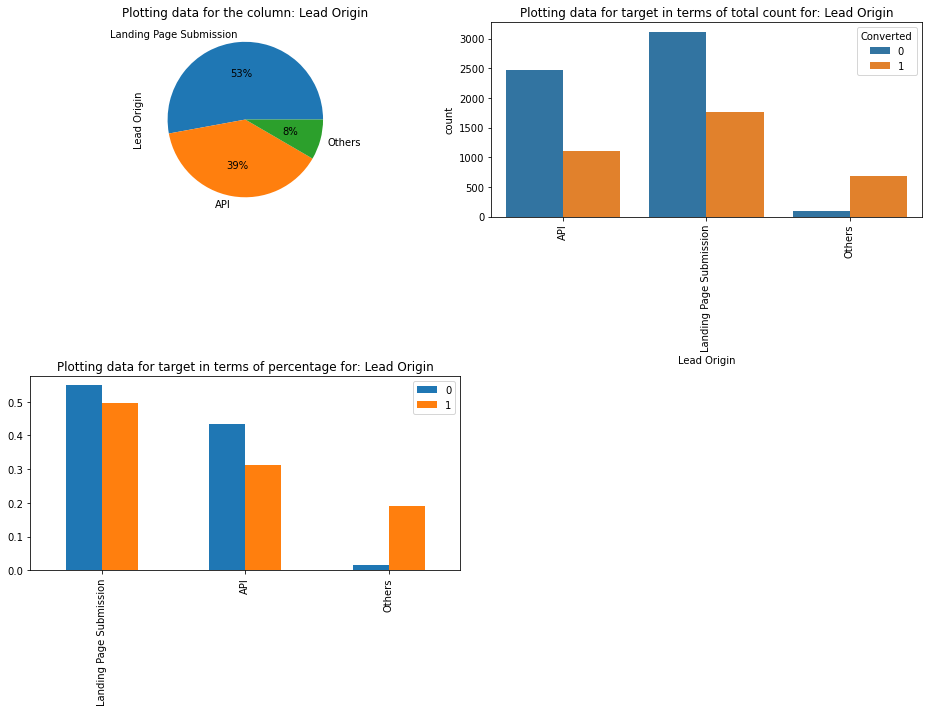

Pltting  Lead Source


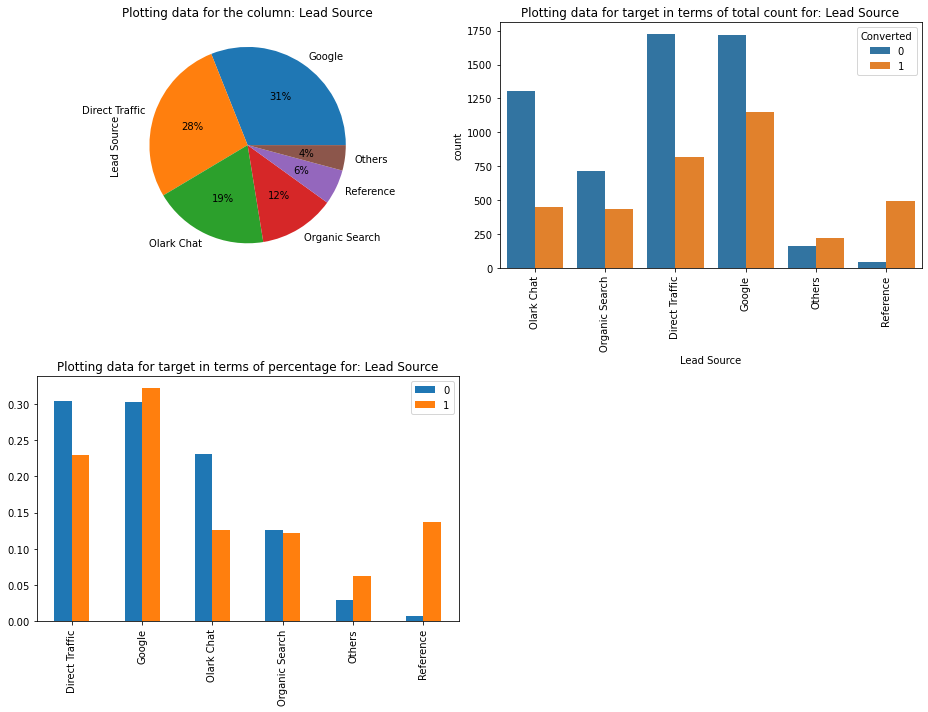

Pltting  Do Not Email


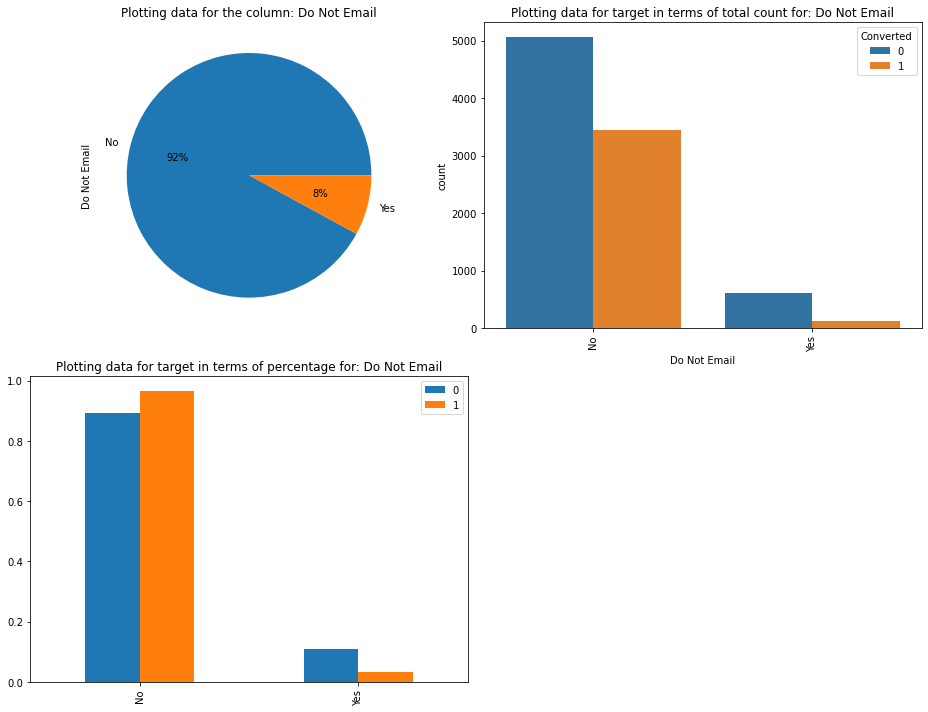

Pltting  Last Activity


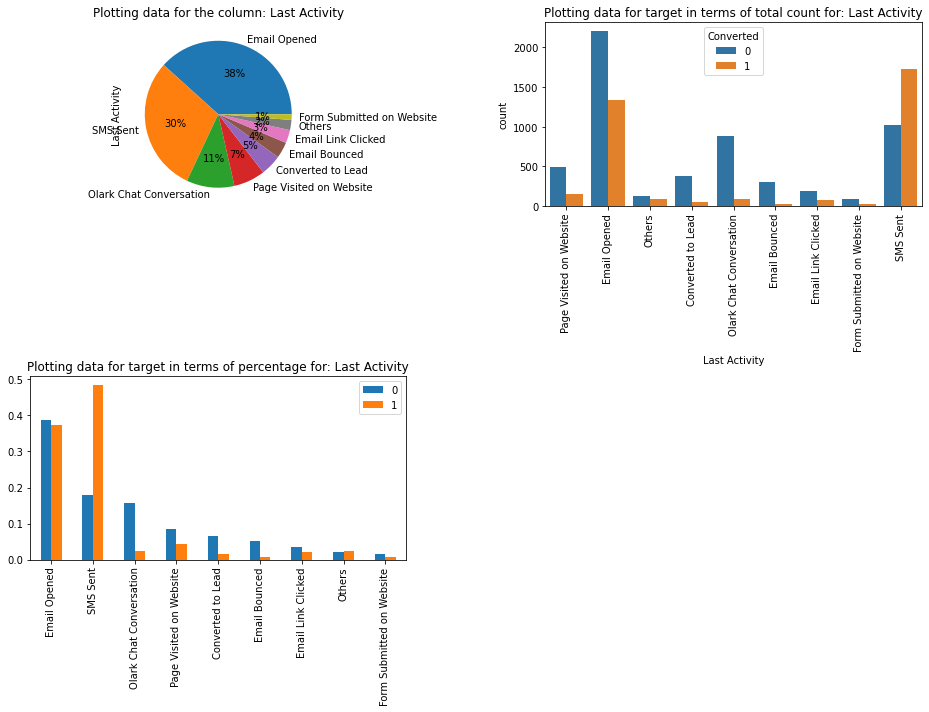

Pltting  What is your current occupation


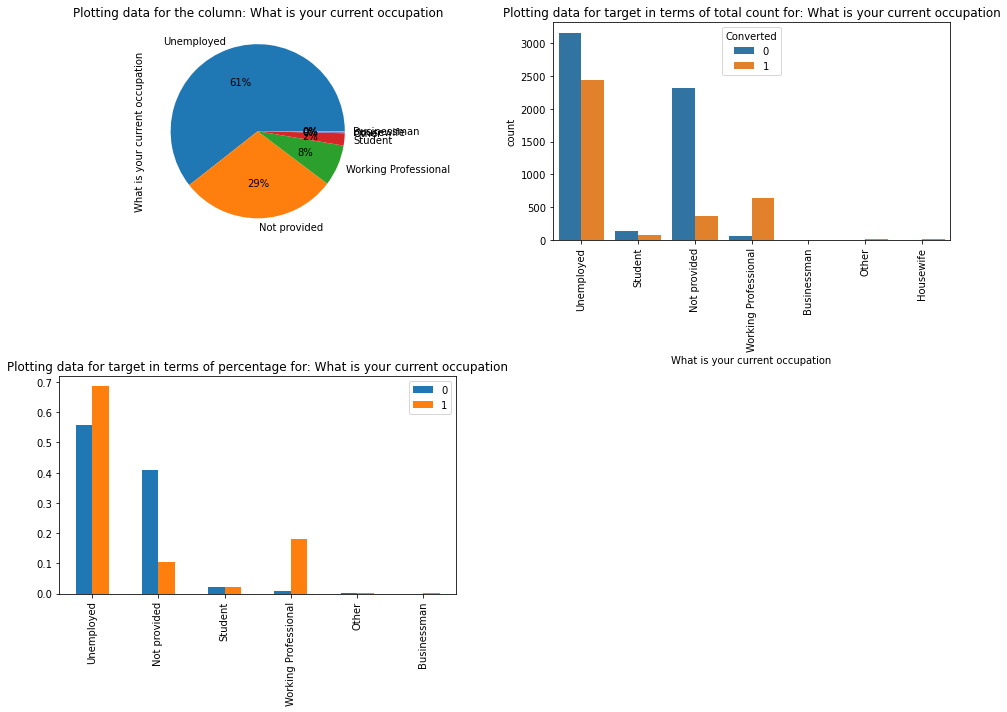

Pltting  A free copy of Mastering The Interview


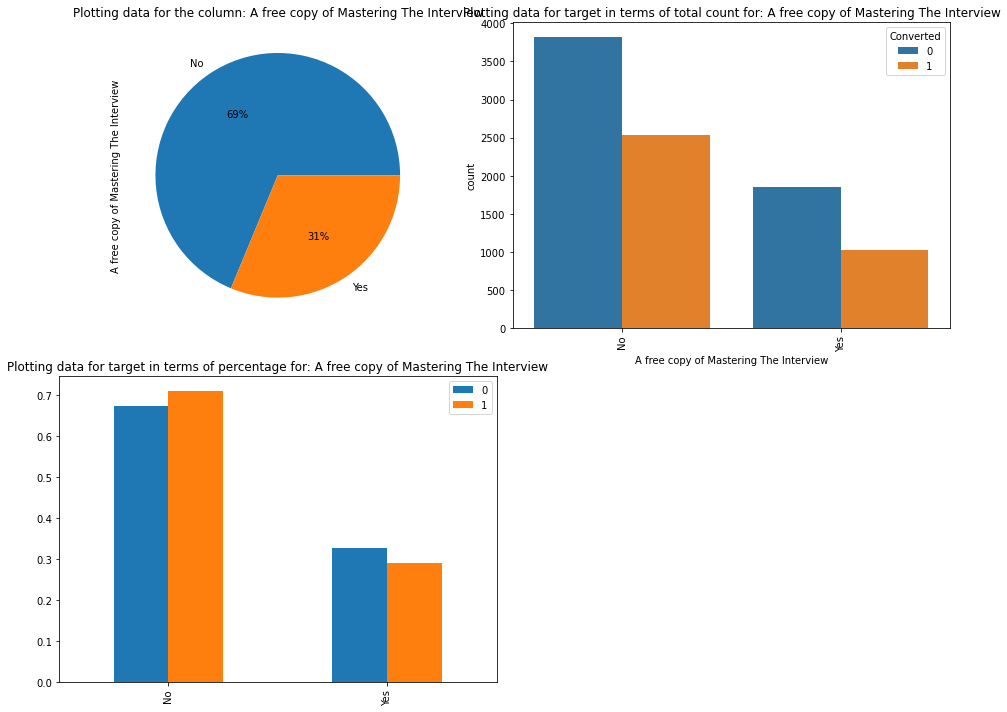

Pltting  Last Notable Activity


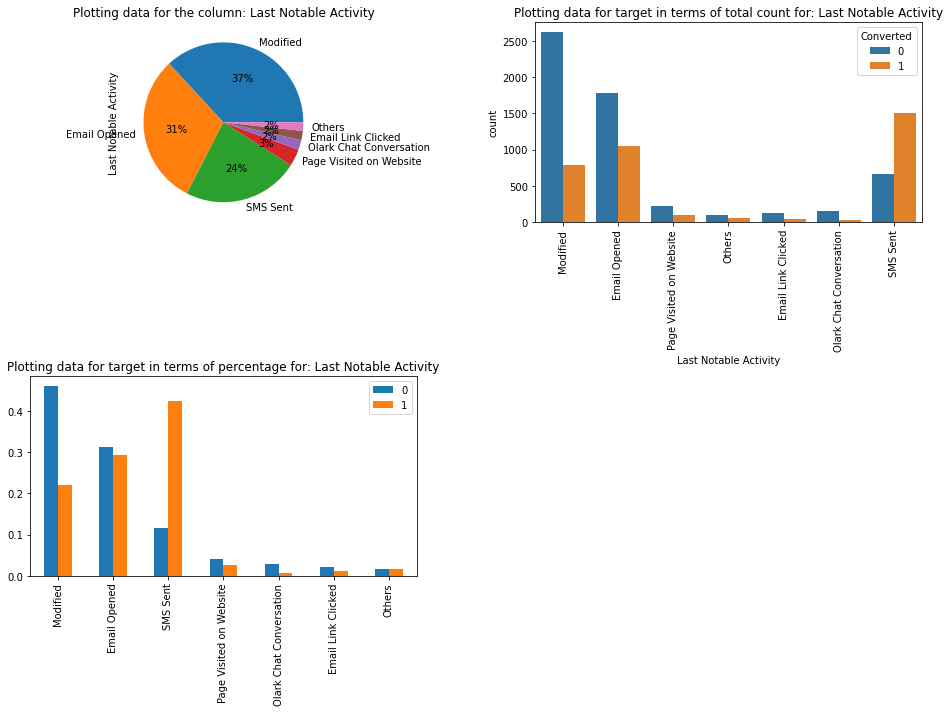

In [263]:
df1=lead_data[lead_data['Converted']==0]
df2=lead_data[lead_data['Converted']==1]
for column in catz:
    print("Pltting ",column)
    plotting(lead_data, df1, df2, column)
    print("=======================================================")

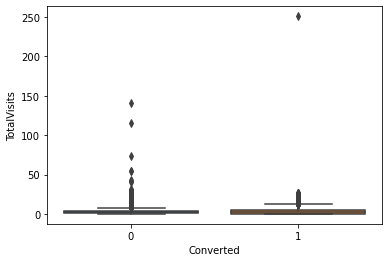

In [264]:
sns.boxplot(y='TotalVisits',x='Converted',data=lead_data)
plt.show()

TotalVisits views are having lots of outliers

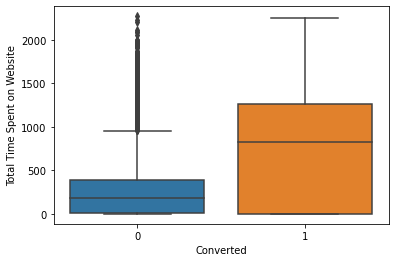

In [265]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=lead_data)
plt.show()

people not getting converted is having lots of outlier for Total Time Spent on Website

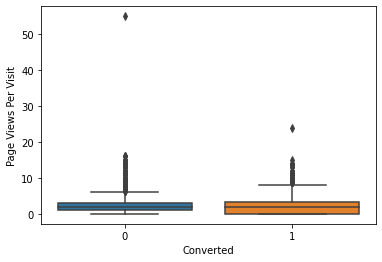

In [266]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data=lead_data)
plt.show()

Page Views Per Visit also having outliers

## Converting Yes/No to 0 and 1

In [267]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [268]:
# List of variables to map

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [269]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


### Creating dummy Variables

In [270]:
cat_cols= lead_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [271]:
data = pd.get_dummies(data=lead_data,columns=cat_cols,drop_first=True)

In [272]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
# We specify random_state so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 200)

### Rescaling the Features

In [275]:
from sklearn.preprocessing import MinMaxScaler

In [276]:
scaler = MinMaxScaler()

In [277]:
##y_train = df_train.pop('Converted')
##X_train = df_train

In [278]:
num_cols=df_train.select_dtypes(include=['float64', 'int64']).columns

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

#checking X-train dataset after scaling
df_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9160,1.0,1.0,0.000000,0.000000,0.000000,0.0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
161,0.0,1.0,0.039841,0.798856,0.060545,1.0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
5022,0.0,1.0,0.000000,0.000000,0.000000,0.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2917,0.0,0.0,0.000000,0.000000,0.000000,0.0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
7665,0.0,0.0,0.000000,0.000000,0.000000,0.0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


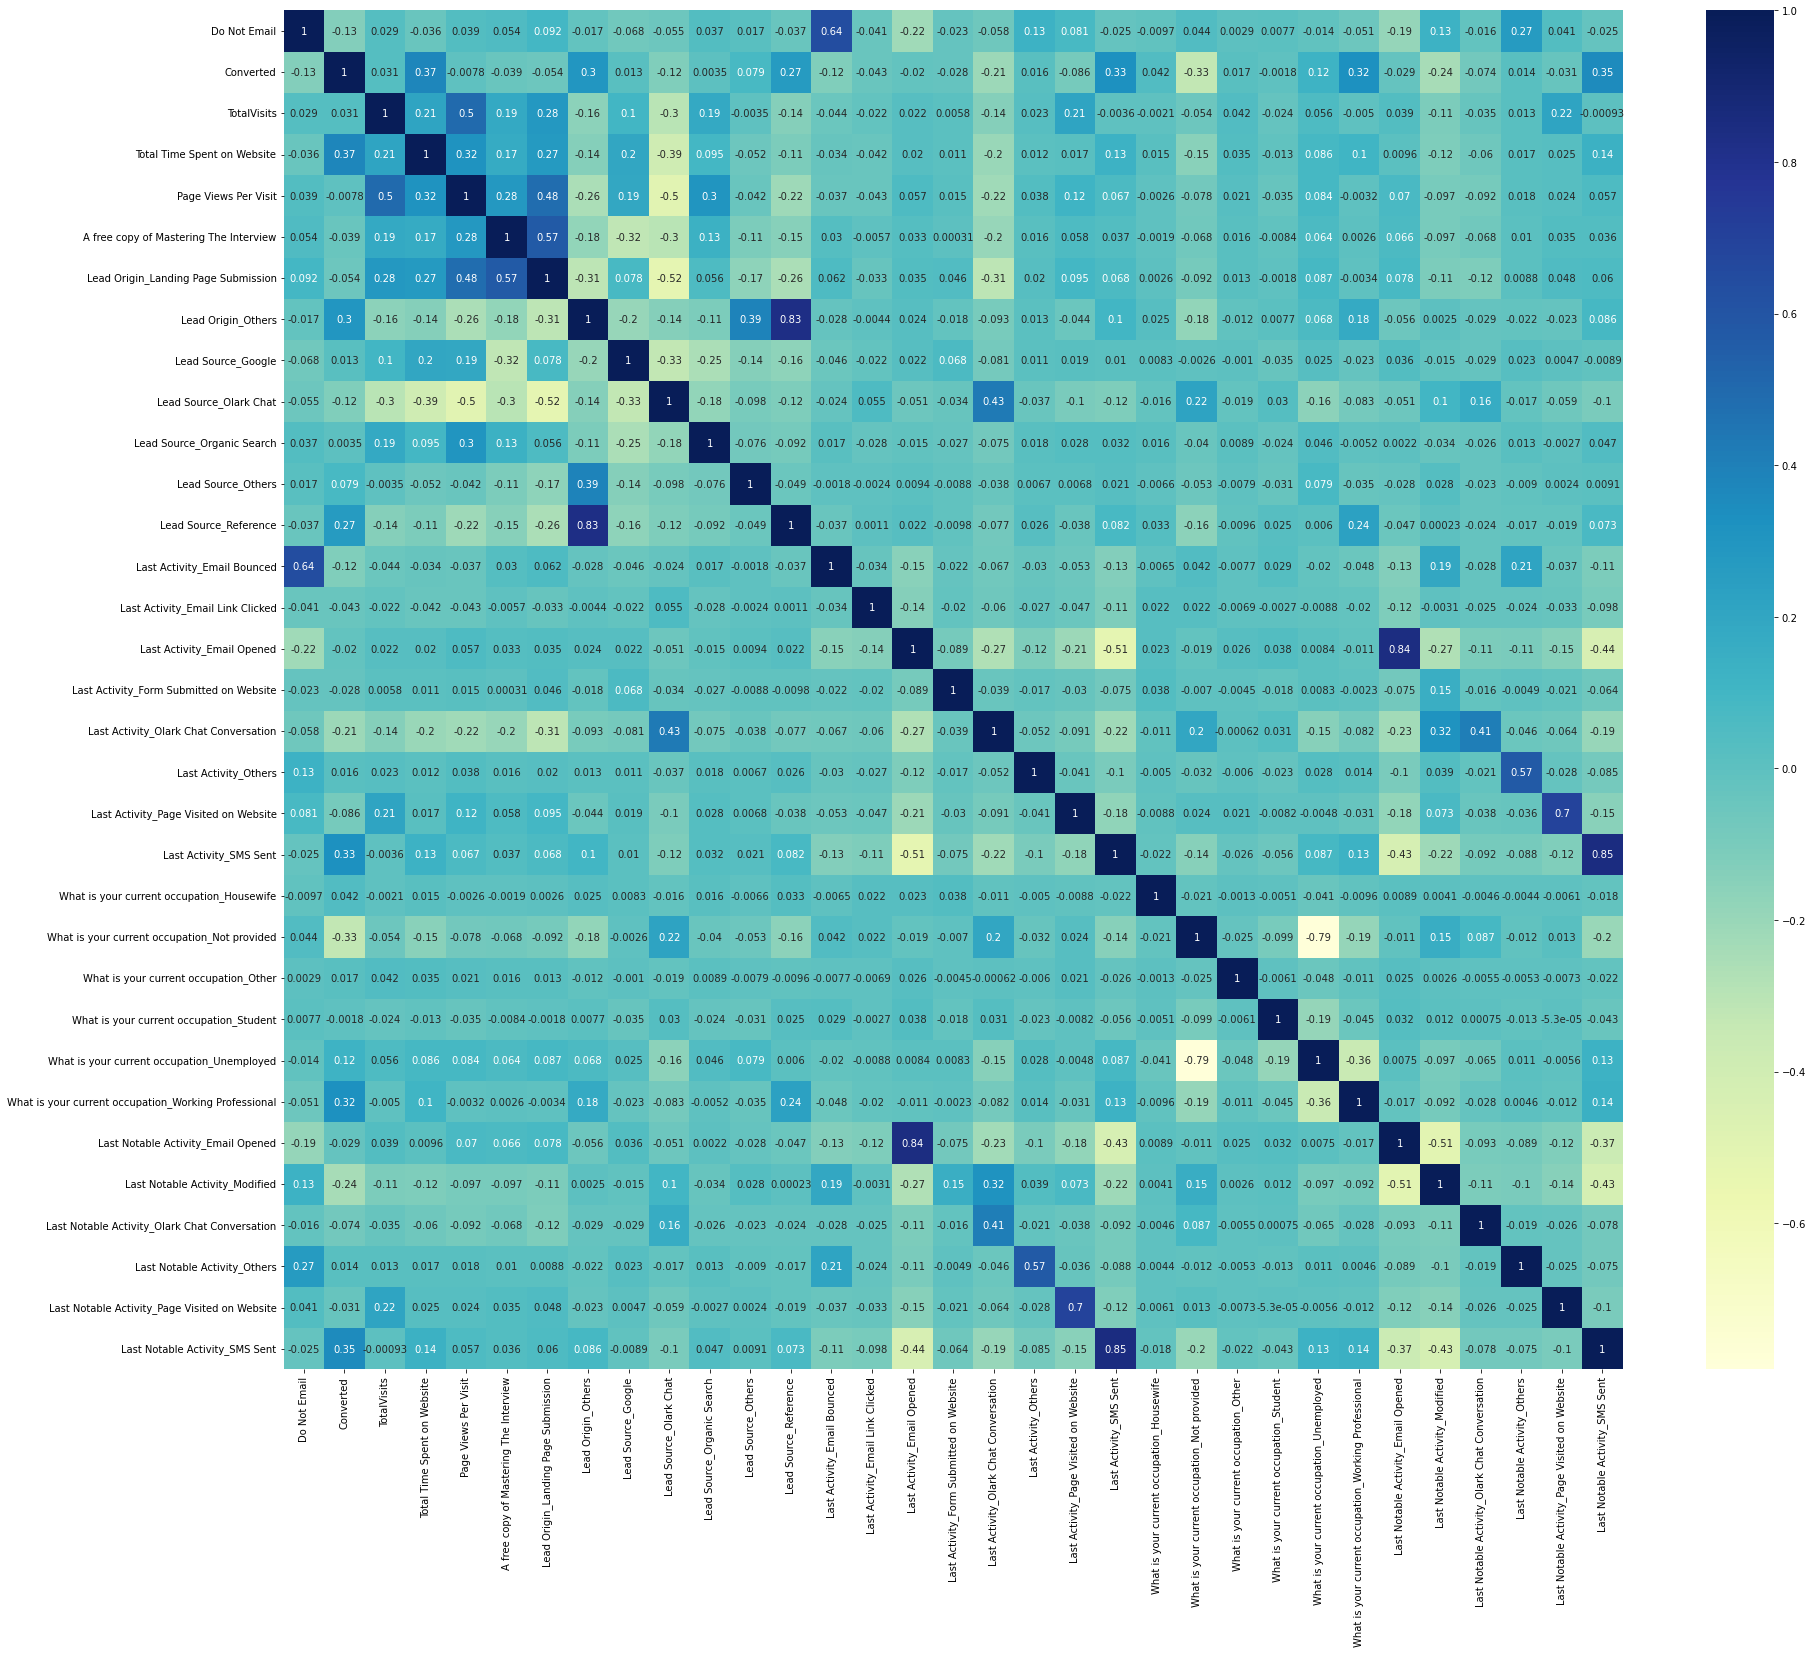

In [279]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [280]:
y_train = df_train.pop('Converted')
X_train = df_train

In [281]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not provided',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Ac

### Model Building using Stats Model & RFE

In [282]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [283]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [284]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Others', False, 10),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', False, 6),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 14),
 ('Last Activity_Olark Chat Conversation', False, 7),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 17),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Not provided', True, 1),
 ('What is your current occupation_Other

In [285]:
col = X_train.columns[rfe.support_]
print(col)

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Others', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Not provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others'],
      dtype='object')


In [286]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Building first Model

In [287]:
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Others,3.46
6,Lead Source_Reference,3.43
3,Page Views Per Visit,2.94
1,TotalVisits,1.97
2,Total Time Spent on Website,1.94
14,Last Notable Activity_Others,1.66
12,Last Notable Activity_Modified,1.65
7,Last Activity_Others,1.55
10,What is your current occupation_Not provided,1.50
8,Last Activity_SMS Sent,1.49


In [288]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.6
Date:                Sun, 26 Feb 2023   Deviance:                       5217.2
Time:                        13:06:34   Pearson chi2:                 7.02e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4095
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9737      0.104    -19.015      0.000      -2.177      -1.770
Do Not Email                                            -1.4713      0.178     -8.285      0.000      -1.819      -1.123
TotalVisits                                              8.2482      2.527      3.265      0.001       3.296      13.200
Total Time Spent on Website                              4.8611      0.174     27.935      0.000       4.520       5.202
Page Views Per Visit                                    -3.7133      1.311     -2.831      0.005      -6.284      -1.143
Lead Origin_Others                                       3.0343      0.231     13.118      0.000       2.581       3.488
Lead Source_Olark Chat                                   1.3771      0.122     11.311      0.000       1.138       1.616
Lead Source_Reference                                    0.5784      0.296      1.957      0.050      -0.001       1.158
Last Activity_Others                                     0.6297      0.293      2.151      0.031       0.056       1.204
Last Activity_SMS Sent                                   1.2998      0.076     17.062      0.000       1.150       1.449
What is your current occupation_Housewife               23.0299   1.53e+04      0.002      0.999   -2.99e+04    2.99e+04
What is your current occupation_Not provided            -1.2603      0.088    -14.258      0.000      -1.434      -1.087
What is your current occupation_Working Professional     2.6053      0.195     13.376      0.000       2.224       2.987
Last Notable Activity_Modified                          -0.9002      0.080    -11.211      0.000      -1.058      -0.743
Last Notable Activity_Olark Chat Conversation           -1.3936      0.346     -4.027      0.000      -2.072      -0.715
Last Notable Activity_Others                             0.9012      0.337      2.676      0.007       0.241       1.561
========================================================================================================================
"""

#### Droping the column with high p value What is your current occupation_Housewife

In [289]:
col = col.drop('What is your current occupation_Housewife',1)

## Model 2

In [290]:
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Others,3.46
6,Lead Source_Reference,3.43
3,Page Views Per Visit,2.93
1,TotalVisits,1.97
2,Total Time Spent on Website,1.94
13,Last Notable Activity_Others,1.66
11,Last Notable Activity_Modified,1.65
7,Last Activity_Others,1.55
9,What is your current occupation_Not provided,1.50
8,Last Activity_SMS Sent,1.49


In [291]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.7
Date:                Sun, 26 Feb 2023   Deviance:                       5229.4
Time:                        13:06:35   Pearson chi2:                 7.03e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4084
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9632      0.104    -18.951      0.000      -2.166      -1.760
Do Not Email                                            -1.4743      0.177     -8.306      0.000      -1.822      -1.126
TotalVisits                                              8.1978      2.524      3.248      0.001       3.251      13.144
Total Time Spent on Website                              4.8579      0.174     27.957      0.000       4.517       5.198
Page Views Per Visit                                    -3.7366      1.310     -2.851      0.004      -6.305      -1.168
Lead Origin_Others                                       3.0257      0.231     13.086      0.000       2.573       3.479
Lead Source_Olark Chat                                   1.3687      0.122     11.258      0.000       1.130       1.607
Lead Source_Reference                                    0.5883      0.295      1.992      0.046       0.009       1.167
Last Activity_Others                                     0.6224      0.293      2.127      0.033       0.049       1.196
Last Activity_SMS Sent                                   1.2938      0.076     16.997      0.000       1.145       1.443
What is your current occupation_Not provided            -1.2649      0.088    -14.319      0.000      -1.438      -1.092
What is your current occupation_Working Professional     2.5985      0.195     13.348      0.000       2.217       2.980
Last Notable Activity_Modified                          -0.8958      0.080    -11.178      0.000      -1.053      -0.739
Last Notable Activity_Olark Chat Conversation           -1.3957      0.346     -4.032      0.000      -2.074      -0.717
Last Notable Activity_Others                             0.9028      0.337      2.682      0.007       0.243       1.563
========================================================================================================================
"""

In [292]:
col = col.drop('Lead Source_Reference',1)

## Model 3

In [293]:
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,2.93
1,TotalVisits,1.97
2,Total Time Spent on Website,1.94
12,Last Notable Activity_Others,1.66
10,Last Notable Activity_Modified,1.65
6,Last Activity_Others,1.55
8,What is your current occupation_Not provided,1.50
7,Last Activity_SMS Sent,1.49
5,Lead Source_Olark Chat,1.42
0,Do Not Email,1.22


In [294]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.7
Date:                Sun, 26 Feb 2023   Deviance:                       5233.3
Time:                        13:06:35   Pearson chi2:                 6.90e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9592      0.104    -18.922      0.000      -2.162      -1.756
Do Not Email                                            -1.4952      0.178     -8.395      0.000      -1.844      -1.146
TotalVisits                                              8.1950      2.523      3.248      0.001       3.250      13.140
Total Time Spent on Website                              4.8572      0.174     27.956      0.000       4.517       5.198
Page Views Per Visit                                    -3.7665      1.311     -2.873      0.004      -6.336      -1.197
Lead Origin_Others                                       3.3572      0.171     19.644      0.000       3.022       3.692
Lead Source_Olark Chat                                   1.3667      0.122     11.241      0.000       1.128       1.605
Last Activity_Others                                     0.6301      0.291      2.162      0.031       0.059       1.201
Last Activity_SMS Sent                                   1.2905      0.076     16.957      0.000       1.141       1.440
What is your current occupation_Not provided            -1.2682      0.088    -14.348      0.000      -1.441      -1.095
What is your current occupation_Working Professional     2.6098      0.194     13.440      0.000       2.229       2.990
Last Notable Activity_Modified                          -0.8951      0.080    -11.173      0.000      -1.052      -0.738
Last Notable Activity_Olark Chat Conversation           -1.4030      0.346     -4.052      0.000      -2.082      -0.724
Last Notable Activity_Others                             0.9092      0.337      2.700      0.007       0.249       1.569
========================================================================================================================
"""

In [295]:
col = col.drop('Last Activity_Others',1)

## Model 4

In [296]:
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,2.93
1,TotalVisits,1.97
2,Total Time Spent on Website,1.94
9,Last Notable Activity_Modified,1.62
7,What is your current occupation_Not provided,1.50
6,Last Activity_SMS Sent,1.49
5,Lead Source_Olark Chat,1.42
0,Do Not Email,1.22
4,Lead Origin_Others,1.17
8,What is your current occupation_Working Profes...,1.17


In [297]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.9
Date:                Sun, 26 Feb 2023   Deviance:                       5237.8
Time:                        13:06:36   Pearson chi2:                 6.81e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9592      0.104    -18.917      0.000      -2.162      -1.756
Do Not Email                                            -1.5326      0.179     -8.585      0.000      -1.882      -1.183
TotalVisits                                              8.2956      2.525      3.285      0.001       3.347      13.245
Total Time Spent on Website                              4.8491      0.174     27.938      0.000       4.509       5.189
Page Views Per Visit                                    -3.6761      1.313     -2.800      0.005      -6.249      -1.103
Lead Origin_Others                                       3.3650      0.171     19.702      0.000       3.030       3.700
Lead Source_Olark Chat                                   1.3652      0.122     11.232      0.000       1.127       1.603
Last Activity_SMS Sent                                   1.2852      0.076     16.903      0.000       1.136       1.434
What is your current occupation_Not provided            -1.2714      0.088    -14.395      0.000      -1.445      -1.098
What is your current occupation_Working Professional     2.6080      0.194     13.441      0.000       2.228       2.988
Last Notable Activity_Modified                          -0.8740      0.079    -11.009      0.000      -1.030      -0.718
Last Notable Activity_Olark Chat Conversation           -1.4017      0.346     -4.047      0.000      -2.081      -0.723
Last Notable Activity_Others                             1.3310      0.269      4.955      0.000       0.805       1.857
========================================================================================================================
"""

### Model 4 is looking there are not other option to drop any other variable

## Predicting a Train model

In [298]:
y_train_pred = res.predict(X_train_sm)
y_train_pred.head(10)

9160    0.769265
161     0.991151
5022    0.964400
2917    0.454410
7665    0.187243
1981    0.636692
5645    0.261690
4215    0.041507
1999    0.187243
2261    0.066032
dtype: float64

In [299]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.76926472, 0.99115133, 0.96439977, 0.45441001, 0.18724323,
       0.63669224, 0.26169012, 0.04150731, 0.18724323, 0.0660319 ])

In [300]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1.0,0.769265,9160
1,1.0,0.991151,161
2,1.0,0.964400,5022
3,0.0,0.454410,2917
4,0.0,0.187243,7665


In [301]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1.0,0.769265,9160,1
1,1.0,0.991151,161,1
2,1.0,0.964400,5022,1
3,0.0,0.454410,2917,0
4,0.0,0.187243,7665,0


## Metrics Accuracy, Specificity,Sensitivity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [302]:
# Confusion matrix 
confusion_metric = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_metric)

[[3513  461]
 [ 724 1770]]


In [303]:
## overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8167903525046383


In [304]:
TP = confusion_metric[1,1] # true positive 
TN = confusion_metric[0,0] # true negatives
FP = confusion_metric[0,1] # false positives
FN = confusion_metric[1,0] # false negatives

In [305]:
#sensitivity of logistic regression model
TP / float(TP+FN)

0.7097032878909383

In [306]:
#specificity
TN / float(TN+FP)

0.8839959738298944

In [307]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11600402617010569


In [308]:
# positive predictive value 
print (TP / float(TP+FP))

0.79336620349619


In [309]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8291243804578712


## ROC Curve  

In [310]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

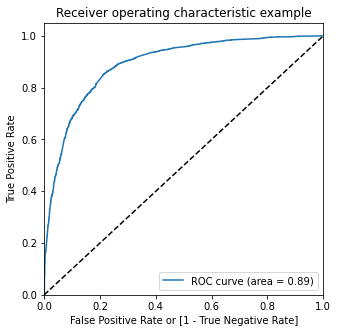

In [311]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [312]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

#### The ROC Curve should be a value close to 1. We are getting a good value of 0.89 indicating a good predictive model.

## Finding Optimal Cutoff Point

In [313]:
rage_numbers = [float(x)/10 for x in range(10)]
for i in rage_numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.769265,9160,1,1,1,1,1,1,1,1,1,0,0
1,1.0,0.991151,161,1,1,1,1,1,1,1,1,1,1,1
2,1.0,0.964400,5022,1,1,1,1,1,1,1,1,1,1,1
3,0.0,0.454410,2917,0,1,1,1,1,1,0,0,0,0,0
4,0.0,0.187243,7665,0,1,1,0,0,0,0,0,0,0,0


In [314]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

In [315]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385591  1.000000  0.000000
0.1   0.1  0.634508  0.972735  0.422245
0.2   0.2  0.770872  0.909383  0.683946
0.3   0.3  0.802566  0.873296  0.758178
0.4   0.4  0.816790  0.779872  0.839960
0.5   0.5  0.816790  0.709703  0.883996
0.6   0.6  0.810915  0.641941  0.916960
0.7   0.7  0.781540  0.523256  0.943634
0.8   0.8  0.761132  0.438653  0.963513
0.9   0.9  0.712585  0.279872  0.984147


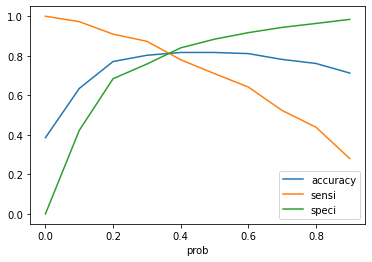

In [316]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### 0.35 is the optimum point to take it as a cutoff probability

In [317]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

In [318]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1.0,0.769265,9160,1,1,1,1,1,1,1,1,1,0,0,1
1,1.0,0.991151,161,1,1,1,1,1,1,1,1,1,1,1,1
2,1.0,0.964400,5022,1,1,1,1,1,1,1,1,1,1,1,1
3,0.0,0.454410,2917,0,1,1,1,1,1,0,0,0,0,0,1
4,0.0,0.187243,7665,0,1,1,0,0,0,0,0,0,0,0,0


In [319]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1.0,0.769265,9160,1,77
1,1.0,0.991151,161,1,99
2,1.0,0.964400,5022,1,96
3,0.0,0.454410,2917,1,45
4,0.0,0.187243,7665,0,19


## Metrics Accuracy, Specificity,Sensitivity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value on final cutoff

In [320]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8115337043908473

In [321]:
# Confusion matrix 
confusion_metric1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
print(confusion_metric1)

[[3124  850]
 [ 369 2125]]


In [322]:
TP = confusion_metric1[1,1] # true positive 
TN = confusion_metric1[0,0] # true negatives
FP = confusion_metric1[0,1] # false positives
FN = confusion_metric1[1,0] # false negatives

In [323]:
#sensitivity of logistic regression model
TP / float(TP+FN)

0.8520449077786688

In [324]:
#specificity
TN / float(TN+FP)

0.7861097131353799

In [325]:
##### Precision
TP / (TP + FP)

0.7142857142857143

In [326]:
##### Recall
TP / (TP + FN)

0.8520449077786688

In [327]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7142857142857143

In [328]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8520449077786688

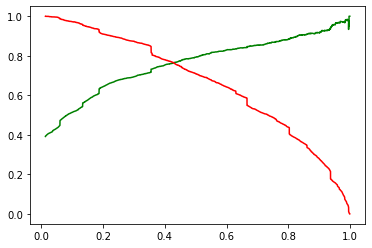

In [329]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Predictions on the test set

In [330]:
num_cols=df_test.select_dtypes(include=['float64', 'int64']).columns

df_test[num_cols] = scaler.fit_transform(df_test[num_cols])

df_test.head()


,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8087,0.0,1.0,0.000000,0.000000,0.000000,0.0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
5177,0.0,0.0,0.113475,0.370507,0.095417,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1148,0.0,1.0,0.007092,0.076498,0.041667,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7291,0.0,1.0,0.028369,0.024424,0.083333,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1979,0.0,1.0,0.042553,0.749309,0.250000,0.0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [331]:
y_test = df_test.pop('Converted')
X_test = df_test

In [332]:
X_test_sm = sm.add_constant(X_test[col])

In [333]:
y_test_pred = res.predict(X_test_sm)

In [334]:
y_test_pred.head(10)

8087    0.982256
5177    0.300807
1148    0.071984
7291    0.348272
1979    0.916322
6549    0.059707
2172    0.345228
6209    0.213249
8505    0.996514
6939    0.917792
dtype: float64

In [335]:
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1.0,8087,0.982256
1,0.0,5177,0.300807
2,1.0,1148,0.071984
3,1.0,7291,0.348272
4,1.0,1979,0.916322


In [336]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1.0,8087,0.982256
1,0.0,5177,0.300807
2,1.0,1148,0.071984
3,1.0,7291,0.348272
4,1.0,1979,0.916322


## Assigning Lead Score

In [347]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [348]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8087,1.0,0.982256,98,1
1,5177,0.0,0.300807,30,0
2,1148,1.0,0.071984,7,0
3,7291,1.0,0.348272,35,0
4,1979,1.0,0.916322,92,1


In [349]:
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    878
0    189
Name: final_Predicted, dtype: int64

## Metrics Accuracy, Specificity,Sensitivity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value on test data

In [350]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7965367965367965

In [351]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_test

array([[1330,  375],
       [ 189,  878]], dtype=int64)

In [352]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [353]:
## sensitivity of our logistic regression model
TP / float(TP+FN)

0.8228678537956888

In [354]:
## specificity
TN / float(TN+FP)

0.7800586510263929

In [355]:
## Precision
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7007182761372706

In [356]:
# Recall
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8228678537956888